# Conjunto de datos

## Obtener el conjunto de datos

In [60]:
# %pip install ucimlrepo
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import os

In [ ]:
path = os.path.join(os.getcwd(),"statlog+german+credit+data/german.data")

column_names = ['estado_cuenta', 'duracion_meses', 'historial_credito', 'proposito', 'monto_credito', 'cuenta_ahorro_bonos', 'empleo_actual', 'tasa_cuota_ingreso',
 'estado_civil_sexo', 'otros_deudores_garantes', 'residencia_actual_anios',
 'propiedad', 'edad', 'otros_planes_cuotas', 'vivienda', 'num_creditos_banco',
 'ocupacion', 'num_personas_a_cargo', 'telefono', 'trabajador_extranjero',
 'buen_mal_credito'
]

df = pd.read_csv(path, header=None, delim_whitespace=True,names=column_names)

print(df.head())
print(df.columns)


  estado_cuenta  duracion_meses historial_credito proposito  monto_credito  \
0           A11               6               A34       A43           1169   
1           A12              48               A32       A43           5951   
2           A14              12               A34       A46           2096   
3           A11              42               A32       A42           7882   
4           A11              24               A33       A40           4870   

  cuenta_ahorro_bonos empleo_actual  tasa_cuota_ingreso estado_civil_sexo  \
0                 A65           A75                   4               A93   
1                 A61           A73                   2               A92   
2                 A61           A74                   2               A93   
3                 A61           A74                   2               A93   
4                 A61           A73                   3               A93   

  otros_deudores_garantes  ...  propiedad edad  otros_planes_cuotas 

C:\Users\CTI24644\AppData\Local\Temp\ipykernel_8384\229446254.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, header=None, delim_whitespace=True,names=column_names)


## Informacion del Datasheet

### Motivación

**¿Con qué propósito se creó el conjunto de datos? ¿Era para una tarea específica? ¿Había una brecha específica que necesitaba ser cubierta?**

El dataset fue creado para clasificar personas descritas por un conjunto de atributos como buenos o malos riesgos crediticios.

Su finalidad principal es apoyar tareas de clasificación en el ámbito financiero, específicamente para evaluar la solvencia crediticia de clientes.

No se indica una brecha específica, pero sí se diseñó para facilitar el desarrollo y evaluación de modelos de predicción de riesgo crediticio.

**¿Quién creó el conjunto de datos (equipo, grupo de investigación) y en nombre de qué entidad?**

El conjunto de datos fue donado por el Profesor Dr. Hans Hofmann, del Institut für Statistik und Ökonometrie, Universität Hamburg, Alemania, como parte del proyecto europeo Statlog.

### Composición

**¿Qué representan las instancias que componen el conjunto de datos? ¿Hay varios tipos de instancias?**

Cada instancia representa a una persona que solicita un crédito bancario. El dataset contiene 1000 ejemplos con 20 características que incluyen variables tanto categóricas como numéricas, describiendo aspectos financieros y personales del solicitante (por ejemplo, estado de cuenta, duración del crédito, historial crediticio, propósito, monto, edad, género, empleo, entre otros).
No hay varios tipos de instancias, todas representan personas solicitantes de crédito.

### Proceso de recopilación

**¿Cómo se adquirieron los datos asociados con cada instancia? ¿Fueron observados directamente, informados por sujetos o derivados? ¿Fueron validados o verificados?**

Los datos provienen de registros bancarios reales, por lo que fueron observados directamente a partir de la información financiera y personal de los solicitantes. No se especifica que hayan sido informados por los sujetos ni derivados indirectamente.
Se menciona que el dataset es un muestreo estratificado de créditos reales, con 1000 créditos (300 malos y 700 buenos).
La validación o verificación específica no está detallada, aunque el dataset ha sido ampliamente utilizado y revisado en la literatura.

### Preprocesamiento/limpieza/etiquetado

**¿Se realizó algún preprocesamiento/limpieza/etiquetado de los datos?**

El dataset original tiene variables tanto numéricas como categóricas, y viene acompañado de un archivo (german.doc) que explica el significado de cada variable y sus categorías.

En general, se hizo lo siguiente:

* Se eliminaron algunas filas con datos faltantes para mantener la calidad.
* Se agruparon algunas categorías poco frecuentes para simplificar el análisis.
* Se renombraron algunas variables para que sean más claras.
* Se definieron algunas variables como ordinales (es decir, con un orden natural).
* Se creó una versión numérica del dataset para facilitar el trabajo con modelos computacionales.

No se hizo una limpieza profunda ni se eliminaron muchas filas, sino que principalmente se hizo codificación y organización para que los datos sean más fáciles de usar.

### Usos

**¿Se ha utilizado el conjunto de datos para alguna tarea?**

Sí, es uno de los datasets más usados para tareas de clasificación en machine learning, especialmente para modelos de riesgo crediticio y fairness en decisiones financieras.

**¿Existe un repositorio que enlace a alguno o todos los documentos o sistemas que utilizan el conjunto de datos?**

Existen múltiples repositorios en GitHub, así como competiciones y kernels en Kaggle que usan este dataset para análisis, modelado y evaluación de fairness.

### Referencias


[Comparative Testing and Evaluation of Statistical and Logical Learning Algorithms for Large-Scale Applications in Classification, Prediction and Control](https://cordis.europa.eu/project/rcn/8791/factsheet/en)

[Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

[South German Credit Data: Correcting a Widely Used Data Set](https://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf)

[Github German Credit Data](https://github.com/rajarshighoshal/german-credit-data/blob/master/README.md)

[Kaggle German Credit Data](https://www.kaggle.com/datasets/uciml/german-credit)

[ejemplo uso en kaggle de los datos](https://www.kaggle.com/code/mehmetirinzalp/credit-risk)

## Análisis exploratorio del conjunto de datos

### Analisis Basico del dataset

In [64]:
df.shape

(1000, 21)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   estado_cuenta            1000 non-null   object
 1   duracion_meses           1000 non-null   int64 
 2   historial_credito        1000 non-null   object
 3   proposito                1000 non-null   object
 4   monto_credito            1000 non-null   int64 
 5   cuenta_ahorro_bonos      1000 non-null   object
 6   empleo_actual            1000 non-null   object
 7   tasa_cuota_ingreso       1000 non-null   int64 
 8   estado_civil_sexo        1000 non-null   object
 9   otros_deudores_garantes  1000 non-null   object
 10  residencia_actual_anios  1000 non-null   int64 
 11  propiedad                1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  otros_planes_cuotas      1000 non-null   object
 14  vivienda                 1000 non-null   

### Significado de las claves internas

Corresponde a los valores unicos definidos en la documentacion oficial, pero solo de variables categoricas o binarias.

In [67]:
valores_unicos_significado = {
    "estado_cuenta": {
        "A11": "... < 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": "... >= 200 DM / salary assignments for at least 1 year",
        "A14": "no checking account"
    },
    "historial_credito": {
        "A30": "no credits taken/ all credits paid back duly",
        "A31": "all credits at this bank paid back duly",
        "A32": "existing credits paid back duly till now",
        "A33": "delay in paying off in the past",
        "A34": "critical account/ other credits existing (not at this bank)"
    },
    "proposito": {
        "A40": "car (new)",
        "A41": "car (used)",
        "A42": "furniture/equipment",
        "A43": "radio/television",
        "A44": "domestic appliances",
        "A45": "repairs",
        "A46": "education",
        "A47": "(vacation - does not exist?)",
        "A48": "retraining",
        "A49": "business",
        "A410": "others"
    },
    "cuenta_ahorro_bonos": {
        "A61": "... < 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ".. >= 1000 DM",
        "A65": "unknown/ no savings account"
    },
    "empleo_actual": {
        "A71": "unemployed",
        "A72": "... < 1 year",
        "A73": "1 <= ... < 4 years",
        "A74": "4 <= ... < 7 years",
        "A75": ".. >= 7 years"
    },
    "estado_civil_sexo": {
        "A91": "male : divorced/separated",
        "A92": "female : divorced/separated/married",
        "A93": "male : single",
        "A94": "male : married/widowed",
        "A95": "female : single"
    },
    "otros_deudores_garantes": {
        "A101": "none",
        "A102": "co-applicant",
        "A103": "guarantor"
    },
    "propiedad": {
        "A121": "real estate",
        "A122": "if not A121 : building society savings agreement/ life insurance",
        "A123": "if not A121/A122 : car or other, not in attribute 6",
        "A124": "unknown / no property"
    },
    "otros_planes_cuotas": {
        "A141": "bank",
        "A142": "stores",
        "A143": "none"
    },
    "vivienda": {
        "A151": "rent",
        "A152": "own",
        "A153": "for free"
    },
    "ocupacion": {
        "A171": "unemployed/ unskilled - non-resident",
        "A172": "unskilled - resident",
        "A173": "skilled employee / official",
        "A174": "management/ self-employed/ highly qualified employee/ officer"
    },
    "telefono": {
        "A191": "none",
        "A192": "yes, registered under the customer's name"
    },
    "trabajador_extranjero": {
        "A201": "yes",
        "A202": "no"
    }
}


En primer lugar, revisamos la columna target "'buen_mal_credito'". Siendo que 1 significa buen credito y 2 significa un mal credito, queremos tener una idea de que tan balanceado esta el dataset.

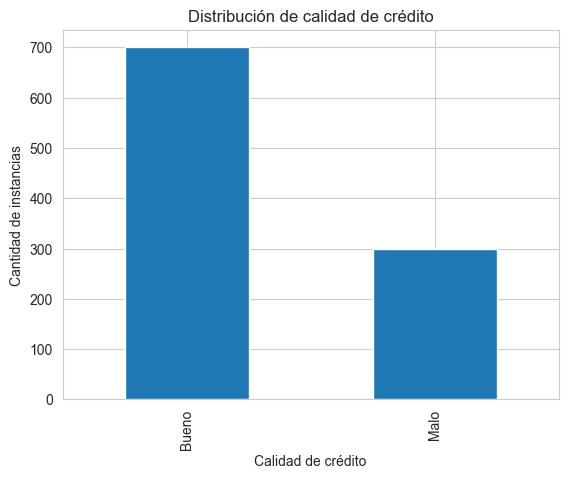

In [83]:
target = df["buen_mal_credito"]
target = df["buen_mal_credito"].map({1: "Bueno", 2: "Malo"})

target.value_counts().plot(kind="bar")
plt.xlabel("Calidad de crédito")
plt.ylabel("Cantidad de instancias")
plt.title("Distribución de calidad de crédito")
plt.show()


In [69]:
print(target.value_counts())

buen_mal_credito
Bueno    700
Malo     300
Name: count, dtype: int64


### Procedemos a analizar los features segun su tipo

Analisis de columnas categoricas

In [79]:
categorical_cols = [
    'estado_cuenta',         
    'historial_credito',     
    'proposito',             
    'cuenta_ahorro_bonos',   
    'empleo_actual',         
    'estado_civil_sexo',     
    'otros_deudores_garantes',
    'propiedad',              
    'otros_planes_cuotas',    
    'vivienda',               
    'ocupacion'               
]

Distribucion de los datos de las columnas categoricas

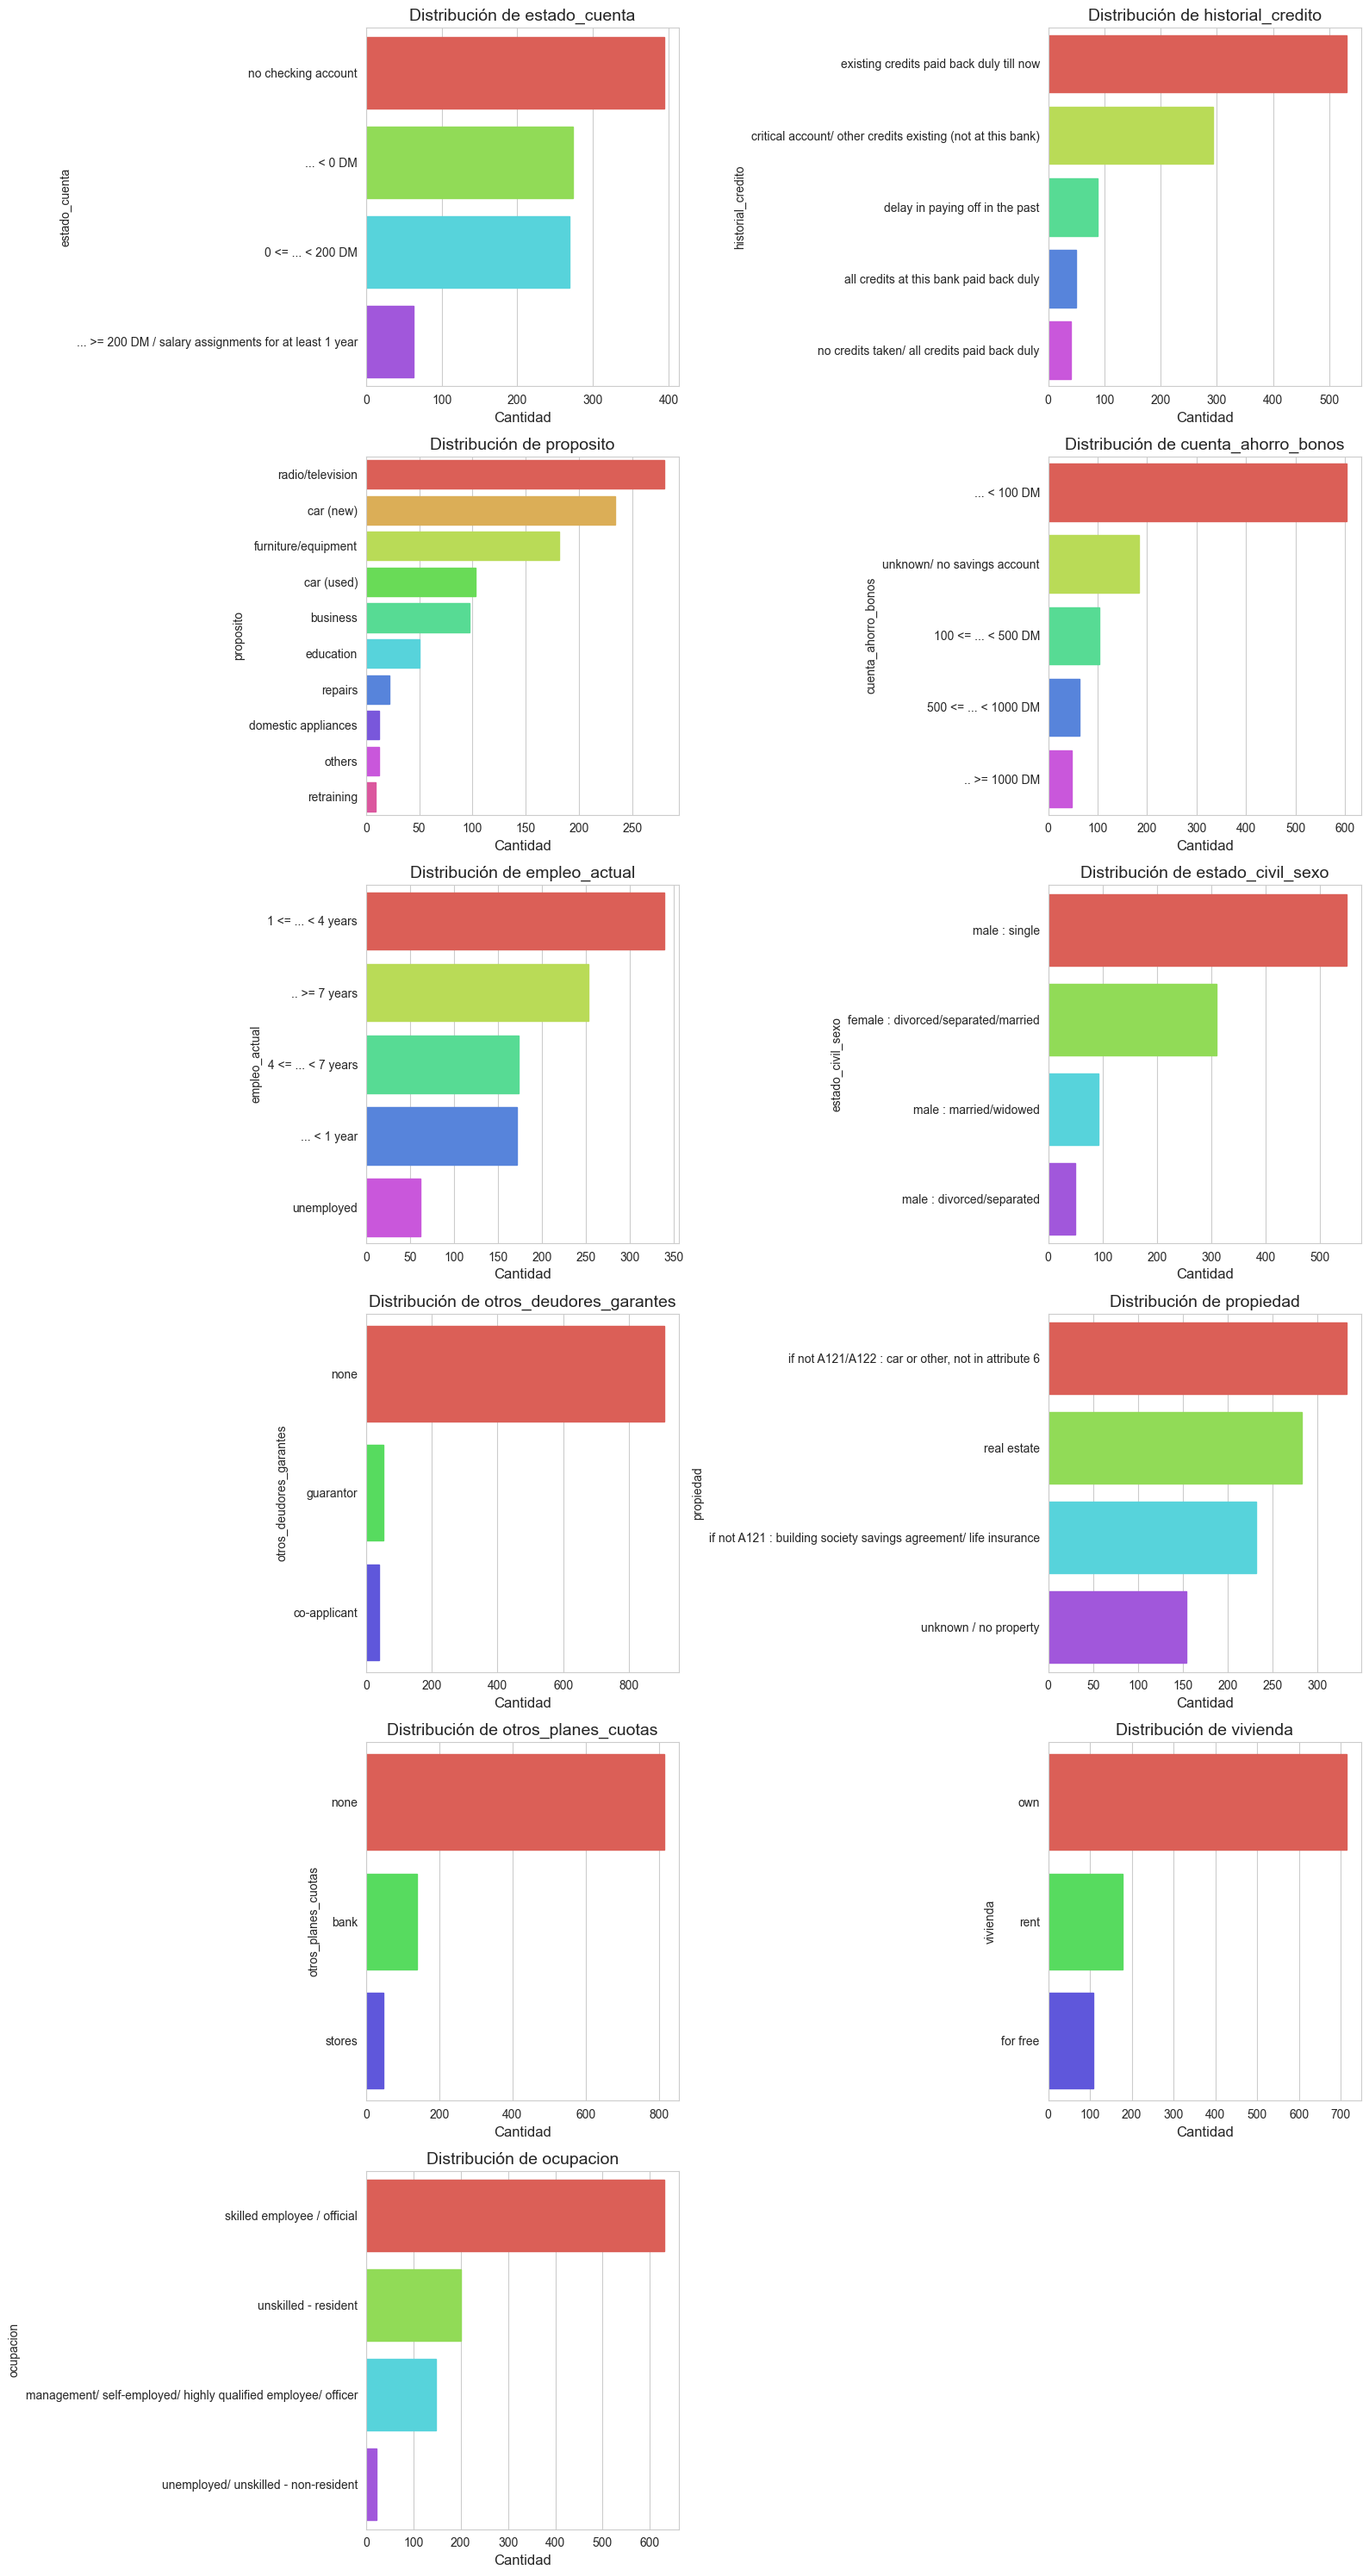

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def traducir_codigos(columna, serie):
    if columna in valores_unicos_significado:
        return serie.map(valores_unicos_significado[columna]).fillna(serie)
    else:
        return serie

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(8 * n_cols, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    order = df[col].value_counts().index
    
    ax = sns.countplot(y=col, data=df, order=order)
    
    etiquetas_codigos = [tick.get_text() for tick in ax.get_yticklabels()]
    
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos
    
    posiciones_ticks = ax.get_yticks()
    ax.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    
    ax.set_yticklabels(etiquetas_descriptivas, fontsize=10)
    
    n_bars = len(order)
    colors = sns.color_palette("hls", n_bars)
    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)
    
    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_xlabel('Cantidad', fontsize=12)
    #ax.set_ylabel('Categorías', fontsize=12)
    
    plt.tight_layout()

plt.show()


### Analisis de columnas Integer

In [72]:
integer_cols = [
    'duracion_meses',        
    'monto_credito',         
    'tasa_cuota_ingreso',    
    'residencia_actual_anios',
    'edad',                   
    'num_creditos_banco',     
    'num_personas_a_cargo'    
]

In [73]:
df[integer_cols].describe()

,duracion_meses,monto_credito,tasa_cuota_ingreso,residencia_actual_anios,edad,num_creditos_banco,num_personas_a_cargo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


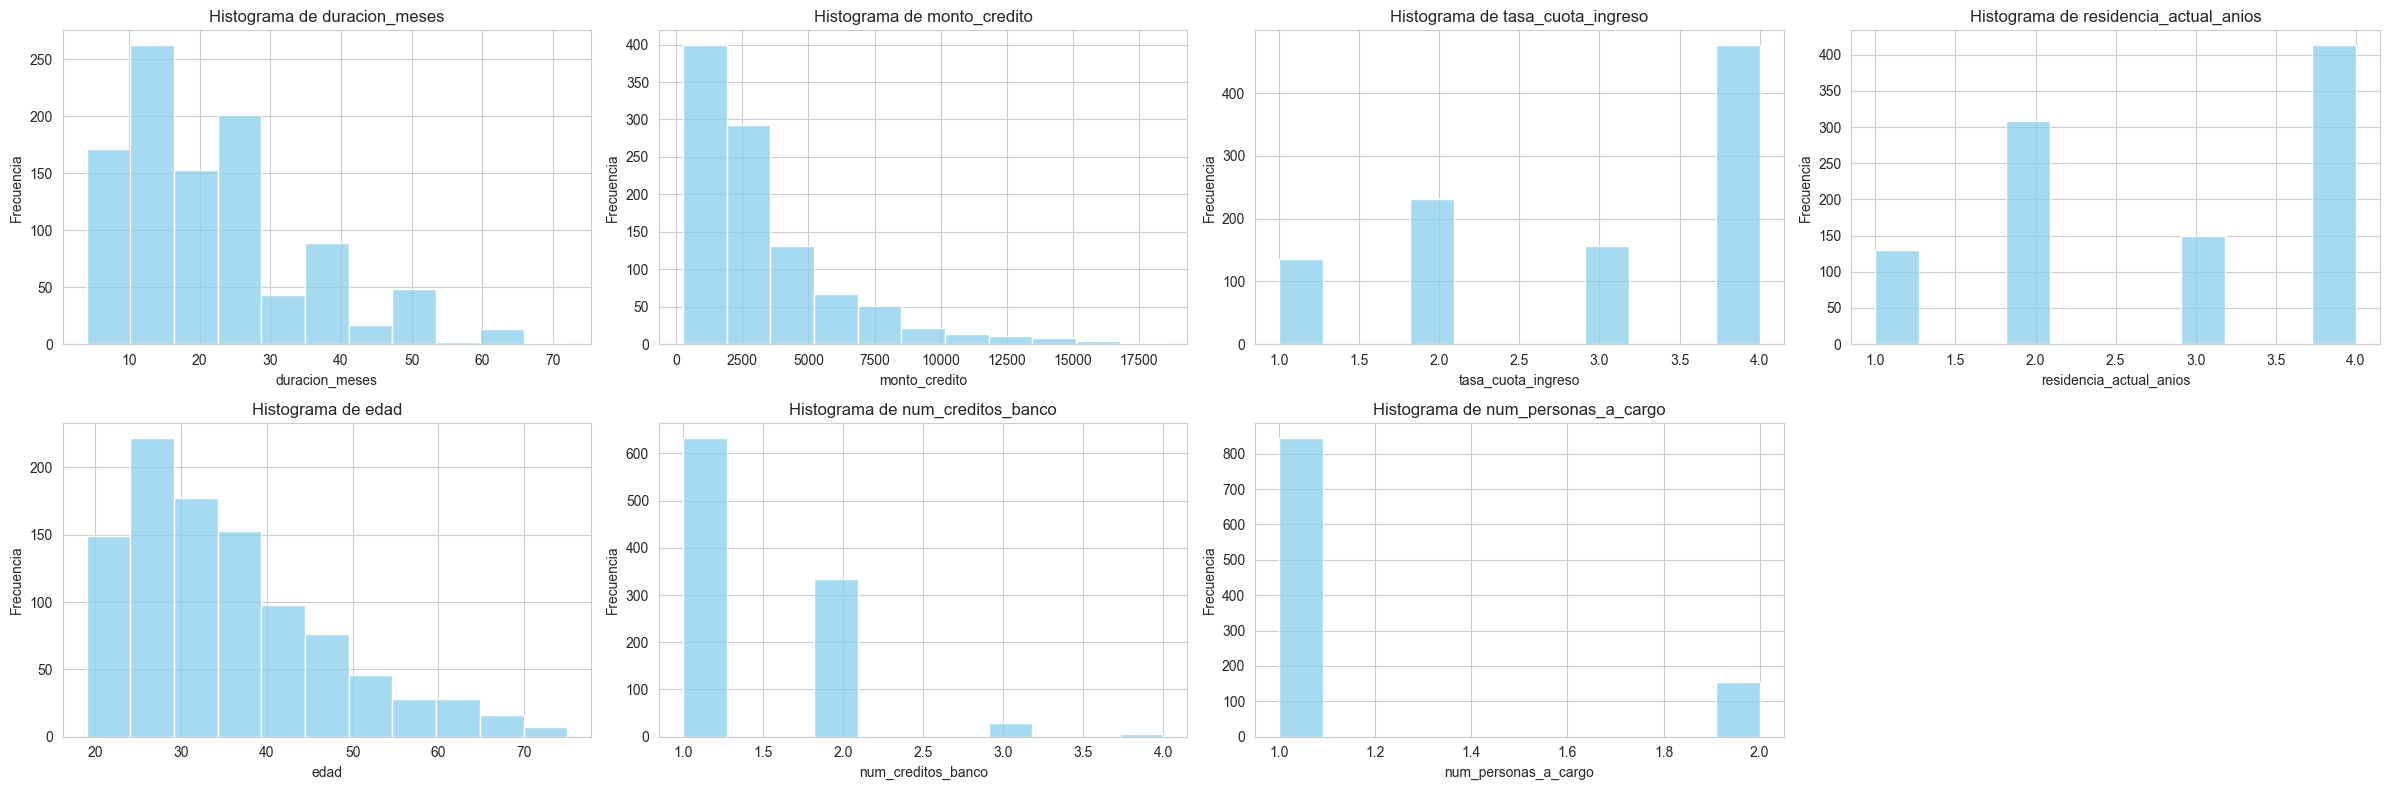

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_cols = 4
n_rows = (len(integer_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(integer_cols, 1):
    data = df[col].dropna()
    data_min, data_max = data.min(), data.max()
    n = len(data)
    bins = int(np.ceil(np.log2(n) + 1))
    
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data, bins=bins, kde=False, color='skyblue', binrange=(data_min, data_max))
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



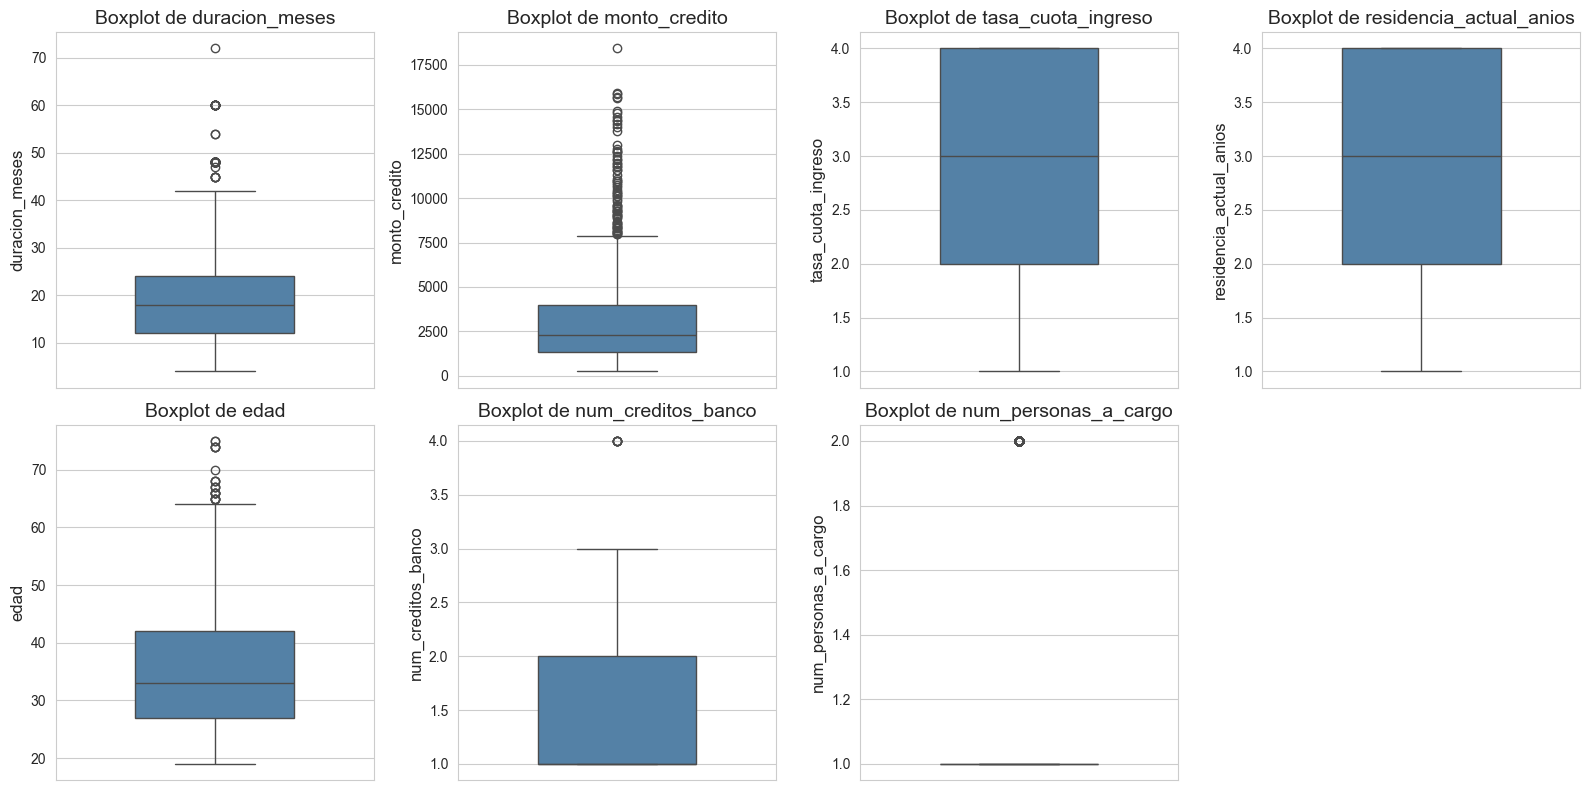

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(integer_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

sns.set_style("whitegrid")

for i, col in enumerate(integer_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue', width=0.5)
    axes[i].set_title(f'Boxplot de {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

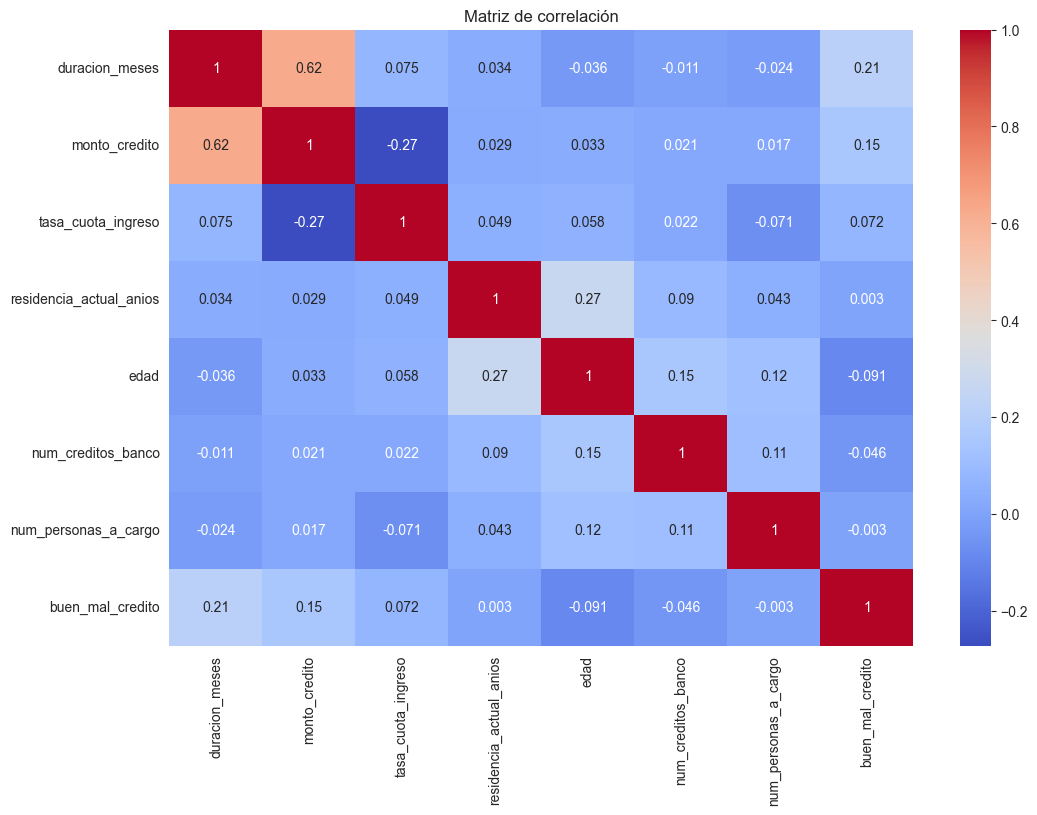

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[integer_cols + ['buen_mal_credito']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Matriz de correlación')
plt.show()

Hay una relacion entre monto_credito y duracion_meses

### Analisis de columnas Binarias

In [77]:
binary_cols = [
    'telefono',               
    'trabajador_extranjero'
]


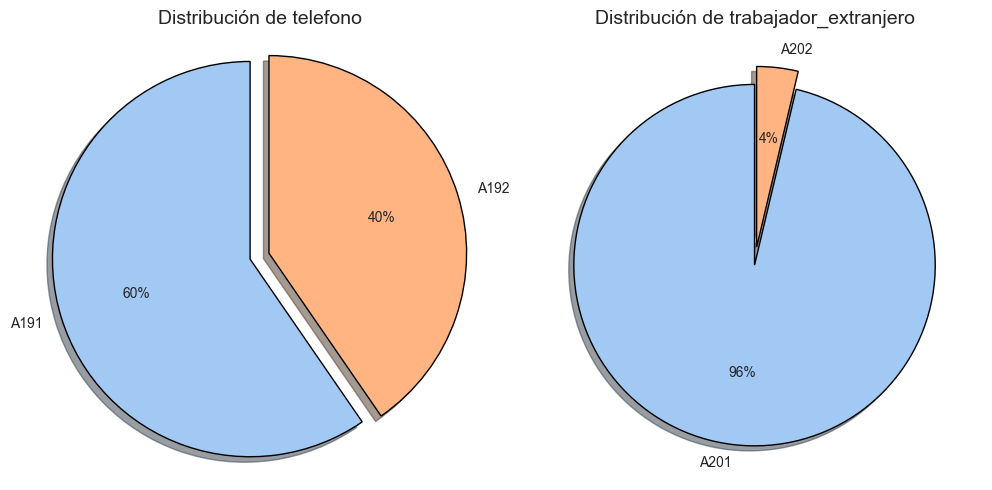

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_rows = (len(binary_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))
sns.set_style("whitegrid")

for i, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df[col].value_counts()
    labels = counts.index.astype(str)
    sizes = counts.values
    colors = sns.color_palette('pastel')[0:len(labels)]
    
    explode = [0.05] * len(labels)
    
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.0f%%',       
        colors=colors,
        startangle=90,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.axis('equal')
plt.tight_layout()
plt.show()


Analisis de posibles sesgos:

* historial_credito / num_creditos_banco: Se podria estar integrando un sesgo institucional, ya que el atributo representa una interaccion previa con el sistema financiero. Si una persona nunca accedio a un credito, no puede tener un historial positivo, pero esta falta de acceso puede deberse a una discriminacion previa. Ademas, aunque tuviera un prestamo previo, su comportamiento ante el pago del mismo tambien puede estar sesgado, dependiendo si tuve mejores condiciones a partir de algun sesgo, puede haberle resultado ms facil o dificil cumplir lo acordado, por lo que puede haber un sesgo de decisiones historicas de las instituciones que afecta/ modifica su riesgo real.

* estado_civil_sexo: Esta columna presenta dos tipos de sesgo. En primer lugar tenemos posibles sesgos historicos relacionados con el genero o el estado civil, que perpetuan direfencias en las oportunidades que tienen ciertos grupos sociales. Por otro lado, tambien hay un problema con la codificación de datos. Mas alla de que mezclar genero y estado civil no es una buena practiva, porque un sesgo con una de ellas puede afectar en la otra, para el genero femenino tenemos dos categorias de estado civil, soltera y casada/divorcida/separada, mientras que para hombre tenemos tres, soltero, casado/viudo y divorciado/separado. Las categorias genero-estado_cibil deberian tener todas las combinaciones.

* propiedad / vivienda / ocupacion / num_personas_a_cargo / empleo_actual / cuenta_ahorro_bonos: Proxies de clase social. Estas variables podrian llevar a que el modelo infiera informacion sobre la situacion socioeconomica de la persona, que puede llevar perpetuar el sesgo historico hacia la clase alta.  

* trabajador_extranjero: Sesgo por discriminaciones sistematicas. El rasismo / xenofobia podria verse integrado en las practicas sociales, llevando a que una persona estranjera no tenga la posibilidad de acceso a un prestamo.  

* Edad: El modelo podria estar generando diferencias a partir de la edad de una persona. Si bien una mayor edad podria darle caracteristicas deseables como historia crediticia y altos cargos o propiedades, ya ha habido casos donde se niegan prestamos a personas en base a su edad. 

Mas alla de las columnas, hay otros tipos de sesgos que pueden estar involucrados:

* Sesgo de representacion: El conjunto representa una muestra poblacional de personas que solicitaron un credito en una institucion particular. Por ende, la poblacion objetivo puede no estar debidamente representada, impidiendo que el modelo pueda generalizar.

* Sesgo cronologico: Los datos son de 1994, por ende, no necesariamente se adecuan a las caracteristicas poblacionales y a los criterios actuales de quien es o no un buen acreedor.

* Sesgo de selección: Es posible que el momento historico y el contexto donde se generaron los datos, haga que cierto conjunto de atributos este mas presente que otro, interfiriendo en los resultados. 

* Sesgo de cohorte: Se usan categorias por defecto para genero. Si e el futuro una persona no binaria quisiera un prestamo, no existiria esa categoria y por ende el modelo no podria clasificar la instancia si genero fuera uno de los atributos que utiliza.

* Sego de confusión: En el dataset hay arios grupos de variables que podrian considerarse proxies de atributos sensibles, por lo que no solo hay relaciones directas, sino que estamos usando varias variables proxie que aluden al mismo atributo. Como hay mucha influencia, puede ocurrr una distorsion de resultados.

* Sesgo poblacional: Los datos del modelo no necesariamente representan la poblacion objetiva, por ende,si bien el modelo puede tener buenos resultados en el entrenamiento y el testing, no necesariamente va a modelar correctamente la poblacion. 


Revisemos la distribucion de los target en base al criterio a estudiar: Sexo, para ver si efectivamente hay una discrepancia

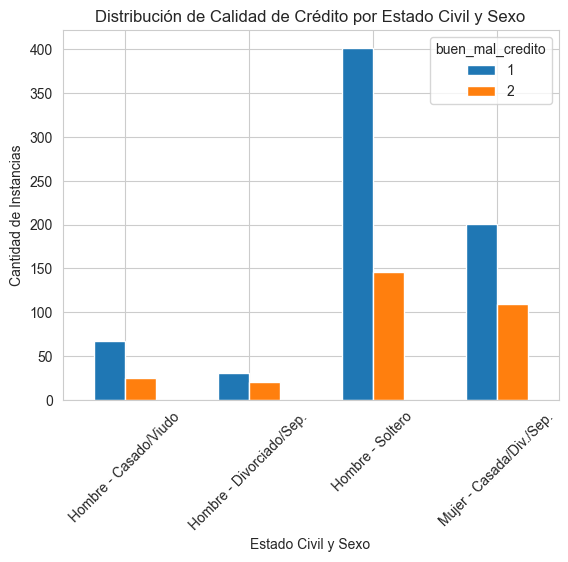

In [86]:
estado_civil_sexo_map = {
    "A91": "Hombre - Divorciado/Sep.",
    "A92": "Mujer - Casada/Div./Sep.",
    "A93": "Hombre - Soltero",
    "A94": "Hombre - Casado/Viudo",
    "A95": "Mujer - Soltera"
}

df["estado_civil_sexo"] = df["estado_civil_sexo"].map(estado_civil_sexo_map)
grouped = df.groupby(['estado_civil_sexo', 'buen_mal_credito']).size().unstack().fillna(0)
grouped.plot(kind='bar', stacked=False)
plt.xlabel("Estado Civil y Sexo")
plt.ylabel("Cantidad de Instancias")
plt.title("Distribución de Calidad de Crédito por Estado Civil y Sexo")
plt.xticks(rotation=45)
plt.show()